**Data diri :**
Nama : Marsa Khairi

email : marsakhairilubis@gmail.com

Domisili : Medan

Graduated from : Information Technology major, University of Sumatera Utara

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import zipfile

from google.colab import files

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-07 13:31:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.57MB/s    in 62s     

2021-07-07 13:32:08 (4.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'                              # menyiapkan direktori utama

In [ ]:
os.listdir(base_dir)                                                            # melihat isi direktori utama

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
#menampilkan isi folder paper
show_paper = os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper')
print(show_paper[:5])
print("Jumlah isi file dalam folder paper : ", len(show_paper))

['JFOcfFSm3Ul0Xkha.png', 'oWI7JL85eXDhRFcV.png', 'prCirglnpqZ4KRmM.png', 'CnRjJejRPD3QmYTl.png', 'PwkqvoT0noMITNaF.png']
Jumlah isi file dalam folder paper :  712


In [ ]:
#menampilkan isi folder rock
show_rock = os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')
print(show_rock[:5])
print("Jumlah isi file dalam folder rock : ", len(show_rock))

['JIdgNYR5ymqv8uxv.png', 'HHXLX66BbEVNYl6W.png', 'gtVEm7JEdr0wE1ip.png', '6bGxG6c9DxmZBcIB.png', 'VnSCn5IIg7m8d9Os.png']
Jumlah isi file dalam folder rock :  726


In [ ]:
#menampilkan folder scissors
show_scissors = os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors')
print(show_scissors[:5])
print("Jumlah isi file dalam folder scissors : ", len(show_scissors))

['HJ3qSJKzOvM3IwZR.png', 'hzvSpM4olIqXfeVt.png', 'SJCguzLeVcfuZ2OA.png', 'WUEe440w137BuSEE.png', '7gnNbHRprrV3r7kX.png']
Jumlah isi file dalam folder scissors :  750


In [ ]:
#generator image
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,                                           # rotasi gambar dapat dilakukan sampai sudut 20
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)                                      # menggunakan 60% untuk data training, 40% data validasi (diminta di soal)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset = 'training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 15, 15, 128)     

In [ ]:
# membuat fungsi callback agar berhenti ketika akurasi mencapai lebih dari 96%
class callBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96): 
      self.model.stop_training = True

callBacks = callBack()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callBacks])

Epoch 1/100
32/32 - 7s - loss: 1.1223 - accuracy: 0.2857 - val_loss: 1.0987 - val_accuracy: 0.3000
Epoch 2/100
32/32 - 6s - loss: 1.1003 - accuracy: 0.3203 - val_loss: 1.1047 - val_accuracy: 0.3000
Epoch 3/100
32/32 - 6s - loss: 1.1084 - accuracy: 0.3906 - val_loss: 1.0964 - val_accuracy: 0.3500
Epoch 4/100
32/32 - 6s - loss: 1.1000 - accuracy: 0.3438 - val_loss: 1.1060 - val_accuracy: 0.1000
Epoch 5/100
32/32 - 6s - loss: 1.1007 - accuracy: 0.3047 - val_loss: 1.0973 - val_accuracy: 0.4000
Epoch 6/100
32/32 - 6s - loss: 1.0885 - accuracy: 0.3750 - val_loss: 1.1269 - val_accuracy: 0.2000
Epoch 7/100
32/32 - 6s - loss: 1.0292 - accuracy: 0.4609 - val_loss: 1.0442 - val_accuracy: 0.2500
Epoch 8/100
32/32 - 6s - loss: 0.9687 - accuracy: 0.5391 - val_loss: 0.8488 - val_accuracy: 0.7000
Epoch 9/100
32/32 - 6s - loss: 0.9740 - accuracy: 0.5391 - val_loss: 0.8229 - val_accuracy: 0.8000
Epoch 10/100
32/32 - 6s - loss: 0.8909 - accuracy: 0.6094 - val_loss: 0.8259 - val_accuracy: 0.7000
Epoch 11/

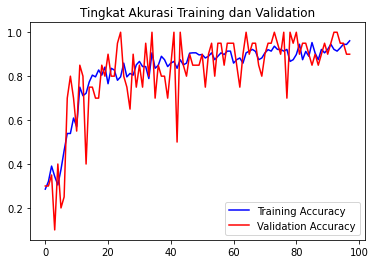

In [ ]:
accuracy = history.history['accuracy']
validation = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy', color='blue')
plt.plot(validation, label='Validation Accuracy', color='red')
plt.title('Tingkat Akurasi Training dan Validation')
plt.legend(loc=0)
plt.show()

In [ ]:
upload_img = files.upload()

Saving IMG20210707234457.jpg to IMG20210707234457.jpg


IMG20210707234457.jpg
rock


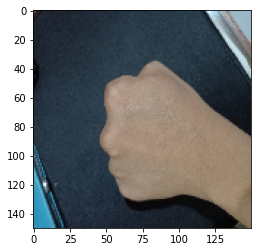

In [ ]:
for fn in upload_img.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Hasilnya : paper')
  elif classes[0][1]==1:
    print('Hasilnya : rock')
  elif classes[0][2]==1:
    print('Hasilnya : scissors')
  else:
    print('tidak diketahui')